In [1]:
%run fungsi_save.ipynb

In [2]:
#pilih data fitur masukan NN1
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values
post = pd.read_csv('data_feature2_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)
output_train_data = train_data[:,total_features+2] #output aja limfo
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
train_data

29


array([[0.23290321, 0.1880663 , 0.80561347, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.33876336, 0.21701657, 0.88720096, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.14477051, 0.07823204, 0.90193096, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.43478703, 0.29436464, 0.82699077, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.43482695, 0.20640884, 0.95507519, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.28595488, 0.25281768, 0.46894224, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [3]:
output_train_data

array([0, 1, 0, ..., 1, 0, 0])

In [4]:
np.size(train_data,axis=0)

1390

In [5]:
a = [] #index fitur yang gak kepake
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[2, 5, 6, 11, 12, 14, 16, 19, 24]

In [6]:
train_data = np.delete(train_data, a ,axis=1) #data fitur yang udah terseleksi
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data[0])

Number of training samples is 1390
20
[0.23290321 0.1880663  0.46743473 0.45973021 0.17391968 0.28606383
 0.61069057 0.19392608 0.27244226 0.764981   0.59393149 0.61649561
 0.71176946 0.24770907 0.34098131 0.42035761 0.1609526  0.71176292
 0.29021789 0.405438  ]


In [7]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features+2] #output aja untuk output 1
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi

#save_data1(test_data)

In [8]:
validasi_data.shape

(347, 20)

In [9]:
n_inputs = np.size(train_data,1)
n_hidden = 20
n_classes = 2
n_inputs

20

In [10]:
def forward_prop(params):

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = params[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = params[w1_total:b1_total].reshape((n_hidden,))
    W2 = params[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = params[w2_total:b2_total].reshape((n_classes,))

    # Perform forward propagation
    z1 = train_data.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1 #belum pasti pake fungsi aktivasi apa
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood #belum pasti loss functionnya pake apa
    N = len(train_data) # Number of samples
    corect_logprobs = -np.log(probs[range(N), output_train_data])
    loss = np.sum(corect_logprobs) / N
    return loss

In [11]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [12]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000) #fungsi verbose dan print step error


2021-04-03 11:21:29,099 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████|1000/1000, best_cost=0.28
2021-04-03 11:22:49,750 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 0.2801946522428354, best pos: [-1.01155410e-01 -1.57515100e+00  6.66145774e-01  5.94444491e-01
  4.76324932e-01 -1.39324236e+00  1.23574444e+00  1.90147404e+00
 -3.12840632e-01 -2.89811463e-01  4.66903991e-01  3.46312395e-01
  2.81988956e-01 -4.98242326e-01  5.00628148e-01  6.94575800e-01
  9.99545803e-01  3.54698882e-01 -2.70323450e-01 -2.13745867e+00
 -2.81325050e-01  5.04326524e-01  9.36680493e-01  5.02471383e-01
  1.00370423e+00  7.74282123e-01  1.22170707e+00  3.66947974e-01
 -7.96268449e-01  5.28402523e-01 -6.51735859e-01  9.68299053e-01
 -6.70757895e-01  5.79499376e-01  8.05268464e-01  2.06156741e-01
 -5.23522360e-01 -1.9504239

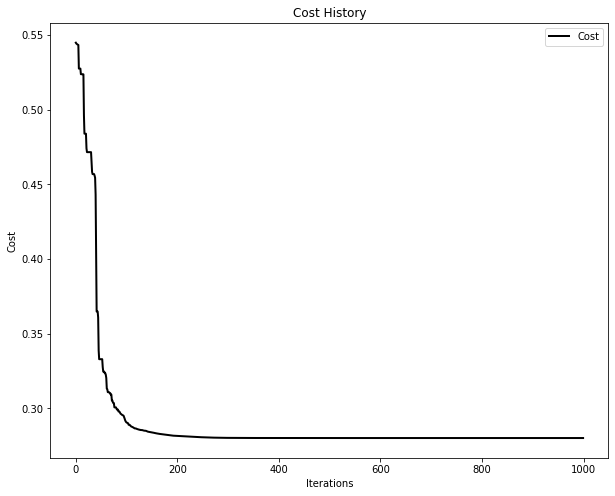

In [13]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [14]:
train_data.shape

(1390, 20)

In [15]:
np.savetxt('hyperparameter.csv', pos, delimiter=",")

In [16]:
#kurang test file
def predict(a, pos): #a = data training atau data test

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = pos[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = pos[w1_total:b1_total].reshape((n_hidden,))
    W2 = pos[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = pos[w2_total:b2_total].reshape((n_classes,))
    save_params2(W1,b1,W2,b2)
    # Perform forward propagation
    z1 = a.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # fungsi aktivasi belum fix
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [17]:
predict(validasi_data,pos)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [18]:
cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
cm_train

array([[996,  71],
       [ 94, 229]], dtype=int64)

In [19]:
cm_validasi

array([[248,  28],
       [ 14,  57]], dtype=int64)

Normalized confusion matrix
[[0.93 0.07]
 [0.29 0.71]]
Normalized confusion matrix
[[0.9 0.1]
 [0.2 0.8]]


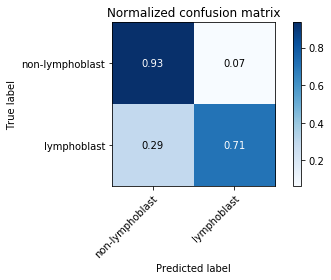

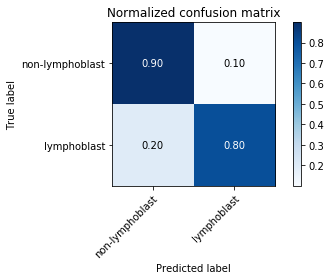

In [20]:
class_names = np.array(['non-lymphoblast',"lymphoblast"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, predict(train_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, predict(validasi_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [21]:
cm_t.figure.savefig('rev3_train2.png')
cm_v.figure.savefig('rev3_validasi2.png')

In [22]:
predict(train_data, pos)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
predict(validasi_data, pos)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [24]:
#### data testing
data_test =  pd.read_csv('rev3_data_testing_NN1.csv', sep=',',header=None)
data_test = data_test.values
len_data_test = np.size(data_test, axis=1)-1
data_test[:,31]

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [25]:
output_test_data = data_test[:,31] #output aja limfo
output_test_data = np.int_(output_test_data)
output_test_data

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1])

In [26]:
data_test = data_test[:,:29]
data_test = np.delete(data_test, a ,axis=1) #data fitur yang udah terseleksi
#drop fitur
data_test

array([[0.52, 0.41, 0.69, ..., 0.75, 0.83, 0.88],
       [0.54, 0.29, 0.45, ..., 0.8 , 0.73, 0.75],
       [0.49, 0.32, 0.97, ..., 0.58, 0.58, 0.86],
       ...,
       [0.25, 0.14, 0.92, ..., 0.85, 0.69, 0.73],
       [0.23, 0.15, 0.19, ..., 0.63, 0.54, 0.59],
       [0.62, 0.32, 0.79, ..., 0.91, 0.91, 0.95]])

In [27]:
#cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
#cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
cm_test = confusion_matrix(output_test_data, predict(data_test, pos))
cm_test

array([[152,  26],
       [ 13,  55]], dtype=int64)

Normalized confusion matrix
[[0.85 0.15]
 [0.19 0.81]]


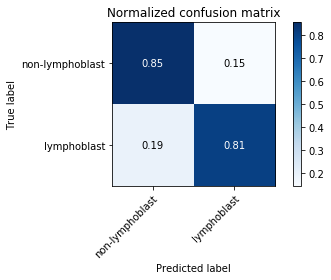

In [28]:
class_names = np.array(['non-lymphoblast',"lymphoblast"])
np.set_printoptions(precision=2)
cm_test2 = plot_confusion_matrix(output_test_data, predict(data_test, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [29]:
cm_test2.figure.savefig('rev3_test2.png')

In [30]:
output_test_data

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1])

In [31]:
print("Presisi data training limfoblas : ", precision(1,cm_train))
print("Recall data training limfoblas (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoblas :  0.7633333333333333
Recall data training limfoblas (sensitivitas) :  0.7089783281733746
Presisi rerata data training :  0.8385474006116208
Presisi rerata data training :  0.8212183112282055
Akurasi data training :  0.8812949640287769
F1 Score data training :  0.829792392146407


In [32]:
print("Presisi data validasi limfoblas : ", precision(1,cm_validasi))
print("Recall data validasi limfoblas : ", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoblas :  0.6705882352941176
Recall data validasi limfoblas :  0.8028169014084507
Presisi rerata data validasi :  0.8085765603951505
Presisi rerata data validasi :  0.850683813023066
Akurasi data validasi :  0.8789625360230547
F1 Score data validasi :  0.8290959062693787


In [33]:
print("Presisi data test limfoblas : ", precision(1,cm_test))
print("Recall data test limfoblas : ", recall(1,cm_test))
print("Presisi rerata data test : ", precision_macro_average(cm_test))
print("Presisi rerata data test : ", recall_macro_average(cm_test))
print("Akurasi data test : ", accuracy(cm_test))
print("F1 Score data test : ", f1_score(precision_macro_average(cm_test),recall_macro_average(cm_test)))

Presisi data test limfoblas :  0.6790123456790124
Recall data test limfoblas :  0.8088235294117647
Presisi rerata data test :  0.8001122334455668
Presisi rerata data test :  0.8313780568407139
Akurasi data test :  0.8414634146341463
F1 Score data test :  0.8154455565650175


In [34]:
pos2 = [i for i in pos]
pos2

[-0.10115540996019141,
 -1.5751509996469137,
 0.666145774157595,
 0.5944444912341527,
 0.47632493216199207,
 -1.3932423615533103,
 1.2357444366563723,
 1.9014740351177906,
 -0.3128406320895639,
 -0.28981146318331585,
 0.46690399093371987,
 0.346312395239515,
 0.28198895575202965,
 -0.4982423258226189,
 0.5006281476651868,
 0.6945757997668591,
 0.999545803385308,
 0.35469888240158554,
 -0.27032345044167944,
 -2.137458666363672,
 -0.2813250500128719,
 0.5043265240898467,
 0.9366804932476499,
 0.5024713827172598,
 1.0037042317342706,
 0.7742821229051554,
 1.22170706615487,
 0.3669479737747284,
 -0.796268448635983,
 0.5284025225393472,
 -0.6517358587937792,
 0.9682990533283868,
 -0.6707578951810118,
 0.5794993763826439,
 0.8052684639107953,
 0.20615674060960087,
 -0.5235223596469923,
 -1.9504239843717674,
 -0.7942676928930285,
 0.32182954375096157,
 -1.0486016328823962,
 0.5588222514847023,
 0.6015232773206315,
 0.1774847931018906,
 0.33795381679955755,
 0.5185854265505829,
 0.630793652827

In [35]:
#save_pos_step1('neuron_step1.csv',(n_hidden,optimizer.cost_history,accuracy(cm_train),accuracy(cm_validasi)))
save_pos_step1('perfo_step2.csv',("1",accuracy(cm_train),accuracy(cm_validasi),accuracy(cm_test),pos2,optimizer.cost_history,post))